# Step 1: 

   ### Task a:  Import the Dataset about Airbnb in Lisbon

In [1]:
# The code was removed by Watson Studio for sharing.

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,14708916,1480,91501272,Shared room,NaN,Lisbon,NaN,Santo AntÃ³nio,19,4.5,4,1,NaN,30,NaN,LOW COST HOSTEL MARQUES GARDENS 4 BED DORM,2017-07-28 01:19:53.215,38.723987,-9.146613,0101000020E61000003F56F0DB104B22C055DD239BAB5C...
1,7465447,1480,704061,Shared room,NaN,Lisbon,NaN,Avenidas Novas,4,3.5,6,1,NaN,39,NaN,Room in Lisbon center,2017-07-28 01:19:53.206,38.735061,-9.154510,0101000020E610000057CF49EF1B4F22C054C8957A165E...
2,11058290,1480,1379661,Shared room,NaN,Lisbon,NaN,Santa Maria Maior,38,4.5,8,1,NaN,39,NaN,Bed in a 8-bed dorm @ This Is Lisbon Hostel,2017-07-28 01:19:52.035,38.715726,-9.132671,0101000020E610000057410C74ED4322C0CD72D9E89C5B...
3,9019111,1480,46762399,Shared room,NaN,Lisbon,NaN,Avenidas Novas,9,4.0,6,1,NaN,37,NaN,Shared mixed bunkbed room 1,2017-07-28 01:19:52.020,38.729017,-9.149932,0101000020E61000006C3F19E3C34C22C0309DD66D505D...
4,3123304,1480,8488955,Shared room,NaN,Lisbon,NaN,Arroios,0,0.0,2,1,NaN,480,NaN,quarto no centro de lisboa,2017-07-28 01:19:50.401,38.721617,-9.136208,0101000020E61000003AE8120EBD4522C06B9E23F25D5C...


### Task b: treat the data (clean, drop, rename...)

In [2]:
df_data_0.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13578 entries, 0 to 13577
Data columns (total 20 columns):
room_id                 13578 non-null int64
survey_id               13578 non-null int64
host_id                 13578 non-null int64
room_type               13578 non-null object
country                 0 non-null float64
city                    13578 non-null object
borough                 0 non-null float64
neighborhood            13578 non-null object
reviews                 13578 non-null int64
overall_satisfaction    13578 non-null float64
accommodates            13578 non-null int64
bedrooms                13578 non-null int64
bathrooms               0 non-null float64
price                   13578 non-null int64
minstay                 0 non-null float64
name                    13549 non-null object
last_modified           13578 non-null datetime64[ns]
latitude                13578 non-null float64
longitude               13578 non-null float64
location                1

In [3]:
df_data_0.shape

(13578, 20)

#### Task b: Clean the dataframe Airbnb in Lisbon

In [4]:
df_data_0.drop(['country','borough',
                'bathrooms','minstay',
                'location','room_id',
                'survey_id','last_modified',
                'host_id',
                #'reviews','overall_satisfaction',
                'city'], 
               axis=1, inplace=True)
df_data_0.head(2)

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude
0,Shared room,Santo AntÃ³nio,19,4.5,4,1,30,LOW COST HOSTEL MARQUES GARDENS 4 BED DORM,38.723987,-9.146613
1,Shared room,Avenidas Novas,4,3.5,6,1,39,Room in Lisbon center,38.735061,-9.154510


In [5]:
df_data_0.isnull().sum()

room_type                0
neighborhood             0
reviews                  0
overall_satisfaction     0
accommodates             0
bedrooms                 0
price                    0
name                    29
latitude                 0
longitude                0
dtype: int64

In [6]:
df_data_0['room_type'].nunique()

3

In [7]:
df_data_0['room_type'].unique()

array(['Shared room', 'Entire home/apt', 'Private room'], dtype=object)

In [8]:
df_data_0['neighborhood'].unique()

array(['Santo AntÃ³nio', 'Avenidas Novas', 'Santa Maria Maior', 'Arroios',
       'Lumiar', 'Areeiro', 'SÃ£o Vicente', 'Campo de Ourique',
       'Parque das NaÃ§Ãµes', 'MisericÃ³rdia', 'Alvalade', 'Olivais',
       'Campolide', 'Marvila', 'Estrela', 'Ajuda', 'Benfica', 'BelÃ©m',
       'Penha de FranÃ§a', 'Santa Clara', 'AlcÃ¢ntara', 'Carnide',
       'SÃ£o Domingos de Benfica', 'Beato'], dtype=object)

In [9]:
df_data_0.replace({'neighborhood': {'Santo AntÃ³nio' : 'Santo António', 
                                    'SÃ£o Vicente' : 'São Vicente',
                                   'Parque das NaÃ§Ãµes' : 'Parque das Nações',
                                   'MisericÃ³rdia' : 'Misericórdia',
                                   'BelÃ©m' : 'Belém',
                                   'Penha de FranÃ§a' : 'Penha de França',
                                   'AlcÃ¢ntara' : 'Alcântara',
                                   'SÃ£o Domingos de Benfica' : 'São Domingos de Benfica'}}, inplace = True)

In [10]:
df_data_0['neighborhood'].unique()

array(['Santo António', 'Avenidas Novas', 'Santa Maria Maior', 'Arroios',
       'Lumiar', 'Areeiro', 'São Vicente', 'Campo de Ourique',
       'Parque das Nações', 'Misericórdia', 'Alvalade', 'Olivais',
       'Campolide', 'Marvila', 'Estrela', 'Ajuda', 'Benfica', 'Belém',
       'Penha de França', 'Santa Clara', 'Alcântara', 'Carnide',
       'São Domingos de Benfica', 'Beato'], dtype=object)

In [11]:
#df_data_0.set_index('neighborhood', inplace=True)
df_data_0.head(2)

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude
0,Shared room,Santo António,19,4.5,4,1,30,LOW COST HOSTEL MARQUES GARDENS 4 BED DORM,38.723987,-9.146613
1,Shared room,Avenidas Novas,4,3.5,6,1,39,Room in Lisbon center,38.735061,-9.154510


In [12]:
df_data_0.shape

(13578, 10)

### Task c:

#### 1) Explore the data 
#### 2) Visualise the data

In [13]:
roomType = df_data_0.groupby('room_type').price.count()
roomType = roomType.reset_index()
roomType = roomType.rename(columns = {'id':'number_Of_Listings'})

roomType.rename(columns={'price':'quantity'}, 
                 inplace=True)
roomType

# This analyses is not the best to count the volume, 
# because in one apartament can have many rooms. 
# It is necessary to sum the accomodates column

,room_type,quantity
0,Entire home/apt,9950
1,Private room,3464
2,Shared room,164


In [14]:
roomType2 = df_data_0.groupby('room_type').accommodates.sum()
roomType2 = roomType2.reset_index()
roomType2 = roomType2.rename(columns = {'id':'number_Of_Listings'})

roomType2.rename(columns={'price':'quantity'}, 
                 inplace=True)
roomType2

,room_type,accommodates
0,Entire home/apt,44740
1,Private room,7102
2,Shared room,745


In [15]:
import numpy as np

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

from collections import Counter

In [16]:
room = df_data_0.room_type
r = Counter(room)

room = pd.DataFrame.from_dict(r, orient = 'index').sort_values(by = 0)
room.columns = ['room_type']

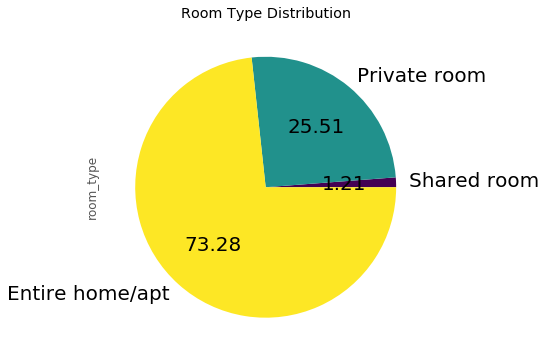

In [17]:
room.plot.pie(y = 'room_type', 
                 colormap = 'viridis', 
                 figsize = (6,6), 
                 fontsize = 20, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')

In [18]:
# Average by room

avgPrice = df_data_0.groupby('room_type').price.mean()
avgPrice = avgPrice.reset_index()
avgPrice = avgPrice.rename(columns = {'price':'average_Price'})
avgPrice

,room_type,average_Price
0,Entire home/apt,103.813769
1,Private room,46.504042
2,Shared room,36.231707


In [19]:
df_data_0.head(2)


,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude
0,Shared room,Santo António,19,4.5,4,1,30,LOW COST HOSTEL MARQUES GARDENS 4 BED DORM,38.723987,-9.146613
1,Shared room,Avenidas Novas,4,3.5,6,1,39,Room in Lisbon center,38.735061,-9.154510


In [20]:
# neighborhood and amount of rooms in total
neighborhood_rooms = df_data_0.groupby('neighborhood').accommodates.sum()
neighborhood_rooms = neighborhood_rooms.reset_index()

neighborhood_prices = df_data_0.groupby('neighborhood').price.mean()
neighborhood_prices = neighborhood_prices.reset_index()

neighborhood_rooms['price'] = neighborhood_prices['price'] 
neighborhood_rooms = neighborhood_rooms.sort_values(by=['accommodates'], ascending=False)

neighborhood_rooms.reset_index(inplace=True)
neighborhood_rooms.drop(['index'], axis=1, inplace=True)
neighborhood_rooms

,neighborhood,accommodates,price
0,Santa Maria Maior,11362,90.430791
1,Misericórdia,10304,92.571663
2,Arroios,6426,73.254198
3,Santo António,4669,86.992070
4,São Vicente,4197,77.727445
5,Estrela,3166,93.742479
6,Avenidas Novas,2077,78.139384
7,Penha de França,1419,68.599520
8,Campo de Ourique,1186,104.595016
9,Belém,1084,101.220930


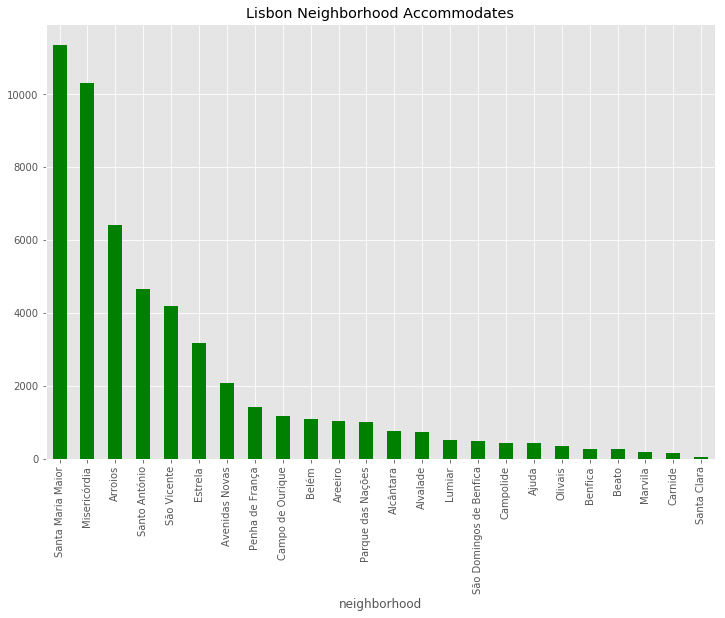

In [21]:
NxA = neighborhood_rooms[["neighborhood", "accommodates"]]
NxA = NxA.set_index('neighborhood')

NxA.plot(kind = 'bar', 
           color = 'green', 
           figsize = (12,8), 
           title = 'Lisbon Neighborhood Accommodates', 
           legend = False)



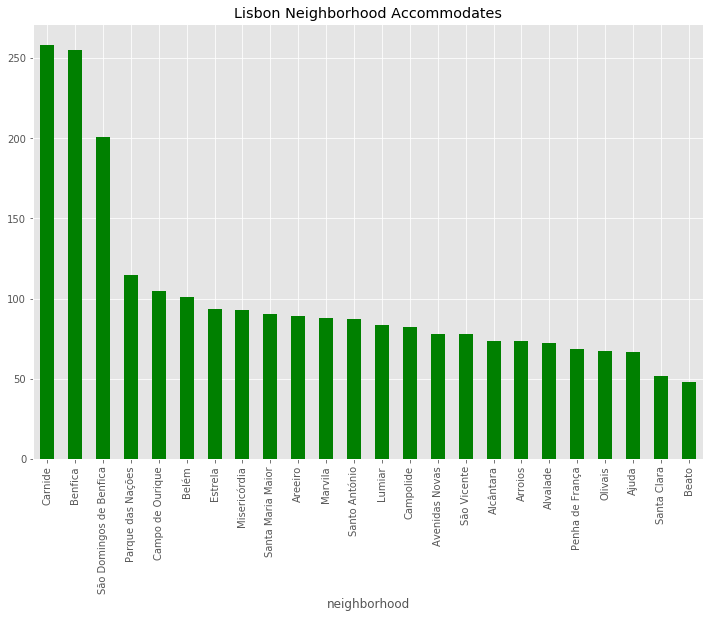

In [22]:
NxP = neighborhood_rooms[["neighborhood", "price"]]
NxP = NxP.set_index('neighborhood')
NxP = NxP.sort_values(by=['price'], ascending=False)

NxP.plot(kind = 'bar', 
           color = 'green', 
           figsize = (12,8), 
           title = 'Lisbon Neighborhood Accommodates', 
           legend = False)

In [23]:
# average nad standart deviation

avg_price = sum(df_data_0.price) / float(len(df_data_0.price))
std = np.std(df_data_0.price)

print('Average price of airbnb in Lisbon is: ', round(avg_price, 2))
print('The Standart Deviation from price of airbnb in Lisbon is: ', round(std, 2))

Average price of airbnb in Lisbon is:  88.38
The Standart Deviation from price of airbnb in Lisbon is:  123.04


(-5, 750)

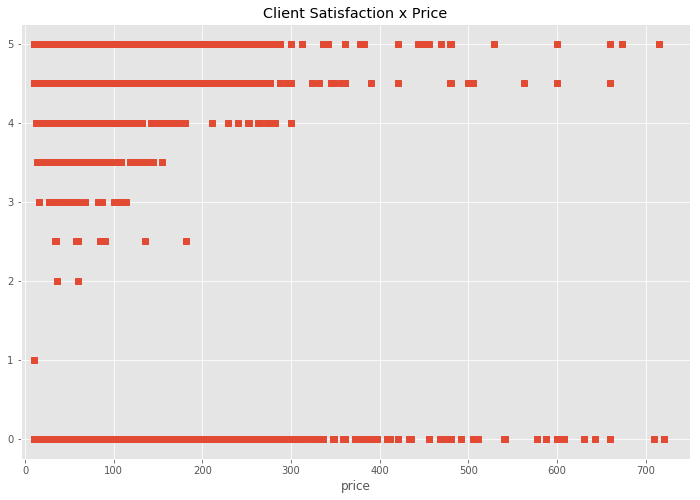

In [24]:
spread_satisfcation = df_data_0[['overall_satisfaction', 'price']].sort_values(by = 'price')

spread_satisfcation.plot(x = 'price', y = 'overall_satisfaction', 
                  style = 's', 
                  figsize =(12,8), 
                  legend = False, 
                  title = 'Client Satisfaction x Price')

plt.xlim(-5, 750)

(-5, 750)

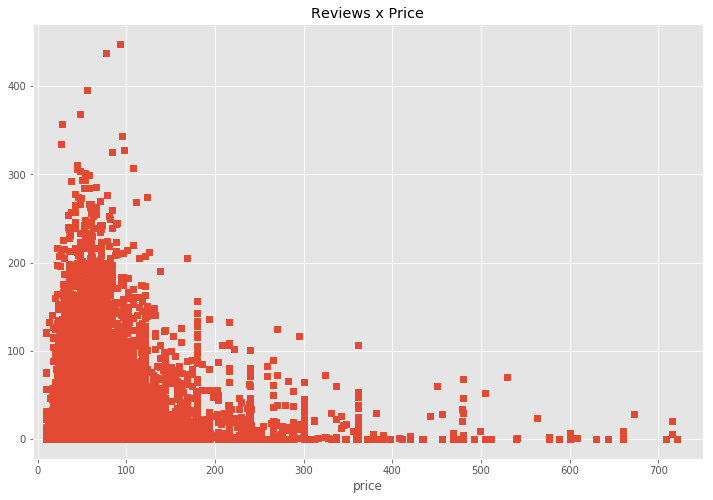

In [25]:
spread_reviews = df_data_0[['reviews', 'price']].sort_values(by = 'price')

spread_reviews.plot(x = 'price', y = 'reviews',
                  style = 's',
                  figsize =(12,8), 
                  legend = False,
                  title = 'Reviews x Price')

plt.xlim(-5, 750)

In [26]:
spread_satisfaction_neigh = df_data_0.groupby('neighborhood').overall_satisfaction.mean()
spread_satisfaction_neigh = spread_satisfaction_neigh.reset_index()
spread_satisfaction_neigh = spread_satisfaction_neigh.set_index('neighborhood')

(0, 5)

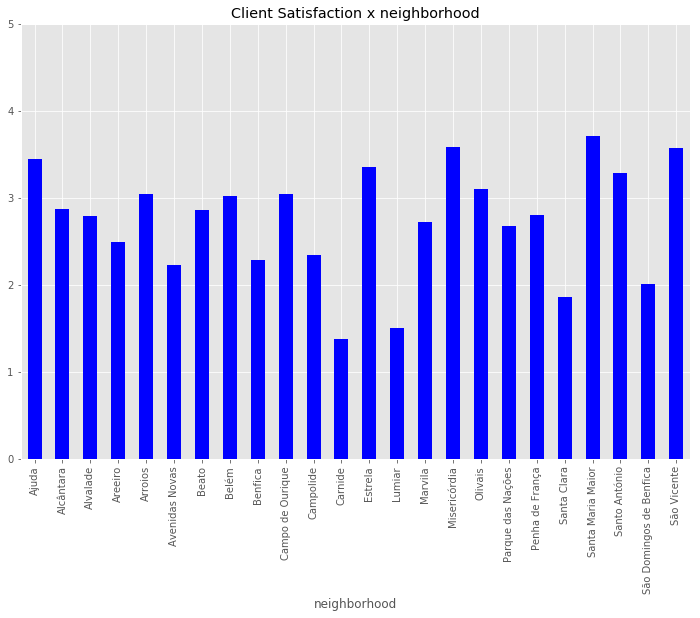

In [27]:
spread_satisfaction_neigh.plot(kind = 'bar' ,
                                  color = 'blue',
                                  figsize =(12,8), 
                                  legend = False, 
                                  title = 'Client Satisfaction x neighborhood')

plt.ylim(0, 5)

In [28]:
spread_satisfaction_rooms = df_data_0.groupby('accommodates').overall_satisfaction.mean()
spread_satisfaction_rooms = spread_satisfaction_rooms.reset_index()
spread_satisfaction_neigh = spread_satisfaction_rooms.set_index('accommodates')

In [29]:
spread_satisfaction_neigh

,overall_satisfaction
accommodates,
1,1.995646
2,3.003854
3,3.425828
4,3.444533
5,3.535078
6,3.403811
7,3.599609
8,3.501285
9,3.500000


## Install  libraries to do the last part of the analises

In [30]:
!conda install -c conda-forge geopy --yes

!conda install -c conda-forge folium --yes

print('Libraries Installed!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

In [32]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests
from pandas.io.json import json_normalize
import json

import folium
from geopy.geocoders import Nominatim

from sklearn.cluster import KMeans

print('Libraries imported!')

Libraries imported!


### Task d: Map with Foluim

In [33]:

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_1 = client_0c321060813f4271b626be2c0ecb629a.get_object(Bucket='capstonecousera-donotdelete-pr-vpnwmnyy0ajcqa', Key='neighbourhoods.geojson')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1 ) 


In [34]:
# download countries geojson file
# !wget --quiet http://data.insideairbnb.com/portugal/lisbon/lisbon/2020-04-29/visualisations/neighbourhoods.geojson -O world_countries.json
#!wget --quiet https://cocl.us/sanfran_geojson -O world_countries.json    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [35]:
world_geo = streaming_body_1 # geojson file


# Portugal latitude and longitude values
address = 'Lisbon, Portugal'

geolocator = Nominatim(user_agent="T_On")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("the geographical coordinate of Lisbon is {}, {}".format(latitude,longitude))

world_map = folium.Map(location=[latitude, longitude], zoom_start=12 )  #Stamen Terrain Mapbox Bright tiles='Stamen Terrain'

from folium import plugins

the geographical coordinate of Lisbon is 38.7077507, -9.1365919


## Preparing data with location to use in foursquare

In [43]:
lat_nei = df_data_0.groupby('neighborhood').latitude.mean()
lat_nei = lat_nei.reset_index()
lon_nei = df_data_0.groupby('neighborhood').longitude.mean()
lon_nei = lon_nei.reset_index()

lis_nei = lat_nei
lis_nei['longitude'] = lon_nei['longitude']
lis_nei.head(2)

,neighborhood,latitude,longitude
0,Ajuda,38.704757,-9.198034
1,Alcântara,38.703800,-9.181797


In [44]:
lis_nei.shape

(24, 3)

### Task e: Analyse neighborhood with Foursquare 

In [45]:
# Client_ID, Client_secret is hidden

In [46]:
# The code was removed by Watson Studio for sharing.

In [47]:
radius = 500
LIMIT = 150

venues_list = []

for lat,lng,neighborhood in zip(lis_nei['latitude'],lis_nei['longitude'],lis_nei['neighborhood']):
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for v in results:
        venues_list.append((
                neighborhood,
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']))

In [48]:
df_venues = pd.DataFrame(venues_list)
df_venues.columns = ['Neighborhood',
                     'Borough Latitude', 
                     'Borough Longitude', 
                     'Venue Name',
                     'Venue Latitude',
                     'Venue Logitude',
                     'Venue Category']
print("Dimension of the Dataframe:", df_venues.shape)
df_venues.head()

Dimension of the Dataframe: (1030, 7)


,Neighborhood,Borough Latitude,Borough Longitude,Venue Name,Venue Latitude,Venue Logitude,Venue Category
0,Ajuda,38.704757,-9.198034,Restaurante Andorinhas,38.704911,-9.199349,Restaurant
1,Ajuda,38.704757,-9.198034,Churrasqueira do Marquês,38.703996,-9.199402,BBQ Joint
2,Ajuda,38.704757,-9.198034,Palácio Nacional da Ajuda,38.707653,-9.197758,Historic Site
3,Ajuda,38.704757,-9.198034,Páteo Alfacinha,38.706537,-9.194202,Restaurant
4,Ajuda,38.704757,-9.198034,Jardim Botânico da Ajuda,38.706430,-9.201222,Botanical Garden


#### How many venues were returned for each Neighborhood

In [49]:
df_venues.groupby(['Neighborhood']).count()

,Borough Latitude,Borough Longitude,Venue Name,Venue Latitude,Venue Logitude,Venue Category
Neighborhood,,,,,,
Ajuda,10,10,10,10,10,10
Alcântara,66,66,66,66,66,66
Alvalade,35,35,35,35,35,35
Areeiro,52,52,52,52,52,52
Arroios,46,46,46,46,46,46
Avenidas Novas,75,75,75,75,75,75
Beato,2,2,2,2,2,2
Belém,59,59,59,59,59,59
Benfica,41,41,41,41,41,41


#### How many unique categories are curated from all retured venues

In [50]:
print('There are {} unique categories'.format(len(df_venues['Venue Category'].unique())))

There are 182 unique categories


In [51]:
#print out list of venue categories
df_venues['Venue Category'].unique()[:50]

array(['Restaurant', 'BBQ Joint', 'Historic Site', 'Botanical Garden',
       'Portuguese Restaurant', 'Church', 'Bakery', 'Plaza',
       'General Entertainment', 'Dessert Shop', 'Bookstore', 'Garden',
       'Gift Shop', 'Mediterranean Restaurant', 'Coffee Shop',
       'Indie Movie Theater', 'Lounge', 'Hotel', 'Café',
       'Eastern European Restaurant', 'Supermarket', 'Music Venue',
       'Flea Market', 'Cupcake Shop', 'Italian Restaurant',
       'Gourmet Shop', 'Nightclub', 'Museum', 'Breakfast Spot',
       'Comfort Food Restaurant', 'Bar', 'Hot Dog Joint', 'Wine Bar',
       'African Restaurant', 'Malay Restaurant', 'Sushi Restaurant',
       'Basketball Stadium', 'Burger Joint', 'Indian Restaurant',
       'Steakhouse', 'Fast Food Restaurant', 'Electronics Store',
       'Ice Cream Shop', 'Asian Restaurant', 'Market', 'Multiplex',
       'Soccer Stadium', 'Organic Grocery', 'Thai Restaurant', 'Tea Room'],
      dtype=object)

#### Let's go to analyze each Neighborhood

In [52]:
Lisbon_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix = "", prefix_sep = "")

#add Name column back to dataframe
Lisbon_onehot['Neighborhood'] = df_venues['Neighborhood']

#move Name to first column
fixed_columns = [Lisbon_onehot.columns[-1]] + list(Lisbon_onehot.columns[:-1])
Lisbon_onehot = Lisbon_onehot[fixed_columns]

Lisbon_onehot.head()

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auditorium,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Board Shop,Bookstore,Botanical Garden,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Stop,Café,Candy Store,Capitol Building,Casino,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Noodle House,Opera House,Organic Grocery,Other Nightlife,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pharmacy,Pizza Place,Planetarium,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Resort,Restaurant,Road,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Women's Store
0,Ajuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ajuda,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Ajuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ajuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0

In [53]:
# Group rows by Name and take mean of frequency of occurence in each category

Lisbon_grouped = Lisbon_onehot.groupby('Neighborhood').mean().reset_index()
Lisbon_grouped

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auditorium,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Board Shop,Bookstore,Botanical Garden,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Stop,Café,Candy Store,Capitol Building,Casino,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Noodle House,Opera House,Organic Grocery,Other Nightlife,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pharmacy,Pizza Place,Planetarium,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Resort,Restaurant,Road,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Women's Store
0,Ajuda,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.00,0.000000,0.00,0.300000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0

In [54]:
print(Lisbon_grouped.shape)

(24, 183)


#### Let's print each Borough along with the top 5 most common venues

In [55]:
num_top_venues = 5

for hood in Lisbon_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Lisbon_grouped[Lisbon_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue', 'Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency':2})
    print(temp.sort_values('Frequency', ascending = False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ajuda----
                   Venue  Frequency
0             Restaurant        0.3
1  Portuguese Restaurant        0.1
2       Botanical Garden        0.1
3          Historic Site        0.1
4                  Plaza        0.1


----Alcântara----
                      Venue  Frequency
0                Restaurant       0.09
1                      Café       0.08
2               Coffee Shop       0.06
3  Mediterranean Restaurant       0.06
4     Portuguese Restaurant       0.06


----Alvalade----
                   Venue  Frequency
0  Portuguese Restaurant       0.14
1     Italian Restaurant       0.09
2           Burger Joint       0.09
3            Coffee Shop       0.09
4                 Bakery       0.09


----Areeiro----
                   Venue  Frequency
0                   Café       0.12
1            Coffee Shop       0.08
2                  Plaza       0.08
3  Portuguese Restaurant       0.06
4           Burger Joint       0.06


----Arroios----
                   Venue  Fre

#### Let's put the TOP 5 into a pandas dataframe

First, let's write a function to sort the venues in descending order.

In [56]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [57]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Neighborhood_venues_sorted = pd.DataFrame(columns=columns)
Neighborhood_venues_sorted['Neighborhood'] = Lisbon_grouped['Neighborhood']

for ind in np.arange(Lisbon_grouped.shape[0]):
    Neighborhood_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Lisbon_grouped.iloc[ind, :], num_top_venues)

Neighborhood_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ajuda,Restaurant,Historic Site,Plaza,Botanical Garden,BBQ Joint,Church,Bakery,Portuguese Restaurant,Dessert Shop,Empanada Restaurant
1,Alcântara,Restaurant,Café,Coffee Shop,Portuguese Restaurant,Mediterranean Restaurant,Bakery,Nightclub,Dessert Shop,Wine Bar,Museum
2,Alvalade,Portuguese Restaurant,Burger Joint,Coffee Shop,Italian Restaurant,Bakery,Café,Restaurant,Asian Restaurant,Bar,Soccer Stadium
3,Areeiro,Café,Plaza,Coffee Shop,Burger Joint,Bakery,Portuguese Restaurant,Electronics Store,Ice Cream Shop,Bookstore,BBQ Joint
4,Arroios,Café,Portuguese Restaurant,Restaurant,Indian Restaurant,Hostel,Breakfast Spot,Coffee Shop,Gym / Fitness Center,Hotel,BBQ Joint


### Task f: Machine learning 

#### Cluster Neighborhoods
We are almost there to finish the analisys. Be strong!!

In [58]:
#set number of clusters
kclusters = 5

Lisbon_grouped_clustering = Lisbon_grouped.drop('Neighborhood',1)

#run k-means
kmeans = KMeans(n_clusters=kclusters, random_state = 0).fit(Lisbon_grouped_clustering)
kmeans.labels_[0:10]

array([1, 1, 1, 0, 3, 1, 4, 1, 1, 1], dtype=int32)

#### Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [59]:
Neighborhood_venues_sorted.insert(0, 'Cluster Lables', kmeans.labels_)

Lisbon_merged = lis_nei

Lisbon_merged = Lisbon_merged.join(Neighborhood_venues_sorted.set_index('Neighborhood'), on='neighborhood')

Lisbon_merged.drop([6], inplace = True)

In [60]:
Lisbon_merged.head(7)

,neighborhood,latitude,longitude,Cluster Lables,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ajuda,38.704757,-9.198034,1,Restaurant,Historic Site,Plaza,Botanical Garden,BBQ Joint,Church,Bakery,Portuguese Restaurant,Dessert Shop,Empanada Restaurant
1,Alcântara,38.703800,-9.181797,1,Restaurant,Café,Coffee Shop,Portuguese Restaurant,Mediterranean Restaurant,Bakery,Nightclub,Dessert Shop,Wine Bar,Museum
2,Alvalade,38.751059,-9.142676,1,Portuguese Restaurant,Burger Joint,Coffee Shop,Italian Restaurant,Bakery,Café,Restaurant,Asian Restaurant,Bar,Soccer Stadium
3,Areeiro,38.740432,-9.134462,0,Café,Plaza,Coffee Shop,Burger Joint,Bakery,Portuguese Restaurant,Electronics Store,Ice Cream Shop,Bookstore,BBQ Joint
4,Arroios,38.725911,-9.136652,3,Café,Portuguese Restaurant,Restaurant,Indian Restaurant,Hostel,Breakfast Spot,Coffee Shop,Gym / Fitness Center,Hotel,BBQ Joint
5,Avenidas Novas,38.736247,-9.150547,1,Restaurant,Coffee Shop,Portuguese Restaurant,Vegetarian / Vegan Restaurant,Café,Hotel,Bakery,Japanese Restaurant,Italian Restaurant,Steakhouse
7,Belém,38.698737,-9.205348,1,Portuguese Restaurant,Coffee Shop,Restaurant,Bakery,Garden,History Museum,BBQ Joint,Italian Restaurant,Plaza,Church


In [61]:
Lisbon_merged[['Cluster Lables']] =  Lisbon_merged[['Cluster Lables']].astype(int)   
Lisbon_merged.head()

,neighborhood,latitude,longitude,Cluster Lables,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ajuda,38.704757,-9.198034,1,Restaurant,Historic Site,Plaza,Botanical Garden,BBQ Joint,Church,Bakery,Portuguese Restaurant,Dessert Shop,Empanada Restaurant
1,Alcântara,38.703800,-9.181797,1,Restaurant,Café,Coffee Shop,Portuguese Restaurant,Mediterranean Restaurant,Bakery,Nightclub,Dessert Shop,Wine Bar,Museum
2,Alvalade,38.751059,-9.142676,1,Portuguese Restaurant,Burger Joint,Coffee Shop,Italian Restaurant,Bakery,Café,Restaurant,Asian Restaurant,Bar,Soccer Stadium
3,Areeiro,38.740432,-9.134462,0,Café,Plaza,Coffee Shop,Burger Joint,Bakery,Portuguese Restaurant,Electronics Store,Ice Cream Shop,Bookstore,BBQ Joint
4,Arroios,38.725911,-9.136652,3,Café,Portuguese Restaurant,Restaurant,Indian Restaurant,Hostel,Breakfast Spot,Coffee Shop,Gym / Fitness Center,Hotel,BBQ Joint


### Visualize clusters

In [62]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, nei, cluster in zip(Lisbon_merged['latitude'], Lisbon_merged['longitude'], Lisbon_merged['neighborhood'], Lisbon_merged['Cluster Lables']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters       

### Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

In [63]:
# Cluster 0
Lisbon_merged.loc[Lisbon_merged['Cluster Lables'] == 0, Lisbon_merged.columns[[1] + list(range(5, Lisbon_merged.shape[1]))]]

,latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,38.740432,Plaza,Coffee Shop,Burger Joint,Bakery,Portuguese Restaurant,Electronics Store,Ice Cream Shop,Bookstore,BBQ Joint
14,38.746936,Shopping Mall,Pharmacy,Gym,Middle Eastern Restaurant,Farmers Market,Italian Restaurant,Café,Electronics Store,Empanada Restaurant
18,38.728919,Scenic Lookout,Snack Place,Supermarket,Plaza,Pizza Place,Coffee Shop,Portuguese Restaurant,Middle Eastern Restaurant,Bakery
22,38.747161,Café,Burger Joint,Snack Place,Convenience Store,Pharmacy,Portuguese Restaurant,Chinese Restaurant,Restaurant,Electronics Store


In [64]:
# Cluster 1
Lisbon_merged.loc[Lisbon_merged['Cluster Lables'] == 1, Lisbon_merged.columns[[1] + list(range(5, Lisbon_merged.shape[1]))]]

,latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,38.704757,Historic Site,Plaza,Botanical Garden,BBQ Joint,Church,Bakery,Portuguese Restaurant,Dessert Shop,Empanada Restaurant
1,38.703800,Café,Coffee Shop,Portuguese Restaurant,Mediterranean Restaurant,Bakery,Nightclub,Dessert Shop,Wine Bar,Museum
2,38.751059,Burger Joint,Coffee Shop,Italian Restaurant,Bakery,Café,Restaurant,Asian Restaurant,Bar,Soccer Stadium
5,38.736247,Coffee Shop,Portuguese Restaurant,Vegetarian / Vegan Restaurant,Café,Hotel,Bakery,Japanese Restaurant,Italian Restaurant,Steakhouse
7,38.698737,Coffee Shop,Restaurant,Bakery,Garden,History Museum,BBQ Joint,Italian Restaurant,Plaza,Church
8,38.748926,Restaurant,Seafood Restaurant,Coffee Shop,Café,Bakery,Pizza Place,Burger Joint,Supermarket,Breakfast Spot
9,38.718358,Seafood Restaurant,Restaurant,Bakery,Italian Restaurant,Steakhouse,Indian Restaurant,Ice Cream Shop,Pizza Place,Coffee Shop
13,38.767512,Pizza Place,BBQ Joint,Breakfast Spot,Café,Soccer Stadium,Chinese Restaurant,Japanese Restaurant,Bakery,Sushi Restaurant
17,38.771476,Burger Joint,Electronics Store,Ice Cream Shop,Cosmetics Shop,Gym / Fitness Center,Seafood Restaurant,Clothing Store,Steakhouse,Restaurant


In [65]:
# Cluster 2
Lisbon_merged.loc[Lisbon_merged['Cluster Lables'] == 2, Lisbon_merged.columns[[1] + list(range(5, Lisbon_merged.shape[1]))]]

,latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,38.782163,Metro Station,Café,Supermarket,Park,Food & Drink Shop,Women's Store,Empanada Restaurant,Fish & Chips Shop,Fast Food Restaurant


In [66]:
# Cluster 3
Lisbon_merged.loc[Lisbon_merged['Cluster Lables'] == 3, Lisbon_merged.columns[[1] + list(range(5, Lisbon_merged.shape[1]))]]

,latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,38.725911,Portuguese Restaurant,Restaurant,Indian Restaurant,Hostel,Breakfast Spot,Coffee Shop,Gym / Fitness Center,Hotel,BBQ Joint
10,38.729399,Japanese Restaurant,Pharmacy,Dance Studio,Train Station,Motorcycle Shop,Restaurant,Eastern European Restaurant,Fast Food Restaurant,Farmers Market
11,38.761846,Restaurant,Café,Theater,Seafood Restaurant,Bakery,BBQ Joint,Coffee Shop,Flea Market,Plaza
12,38.708872,Nightclub,Hotel,Restaurant,Café,Coffee Shop,Greek Restaurant,Italian Restaurant,South American Restaurant,Museum
15,38.711462,Bar,Hostel,Café,Wine Bar,Plaza,Bed & Breakfast,Restaurant,Juice Bar,Lounge
16,38.768924,Café,Hostel,Gym,Market,Park,Coffee Shop,Department Store,Fast Food Restaurant,Farmers Market
20,38.712536,Hotel,Café,Hostel,Wine Bar,Bar,Plaza,Indian Restaurant,Scenic Lookout,African Restaurant
21,38.720839,Hotel,Hostel,Café,Pizza Place,Breakfast Spot,Clothing Store,Restaurant,Steakhouse,Coffee Shop
23,38.717359,Café,Mediterranean Restaurant,Bar,Wine Bar,Garden,Arts & Crafts Store,Hotel,Coffee Shop,Beer Bar


### Checking for correlation between occurrence of surrounding venues with average price

In [70]:
# get the occurrence of each venue type in each neighborhood
venue_count_df = Lisbon_onehot.groupby(['Neighborhood']).sum().reset_index()

print(venue_count_df.shape)
venue_count_df.head()

(24, 183)


,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auditorium,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Board Shop,Bookstore,Botanical Garden,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Stop,Café,Candy Store,Capitol Building,Casino,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Noodle House,Opera House,Organic Grocery,Other Nightlife,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pharmacy,Pizza Place,Planetarium,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Resort,Restaurant,Road,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Women's Store
0,Ajuda,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Alcântara,0,1,0,0,0,0,0,0,0,0,1,0,4,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,5,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,1,0,0,0,3,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,1,1,1,0,0,0,0,0,1,1,0,4,0,0,0,0,0,0,0,0,0,0,2,1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
2,Alvalade,0,0,0,0,0,0,0,0,2,0,1,0,3,2,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,5,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Areeiro,0,0,0,0,1,0,0,0,1,0,2,0,3,1,0,0,0,1,0,0,0,2,0,0,0,0,0,3,0,0,6,0,0,1,0,0,0,0,1,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,4,0,0,0,3,1,0,0,0,1,0,

In [72]:
from sklearn.preprocessing import StandardScaler, normalize, scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

In [73]:
# get the standardized neighborhoods' average prices
lis_nei['avgprice'] = neighborhood_rooms['price']

scaler = StandardScaler()
standardized_price = scaler.fit_transform(lis_nei[['avgprice']])

# add the normalized price to the dataframe
neighborhood_venues_withprice_df = pd.DataFrame(venue_count_df)
neighborhood_venues_withprice_df['StandardizedAvgPrice'] = standardized_price

print(neighborhood_venues_withprice_df.shape)
neighborhood_venues_withprice_df.head()

(24, 184)


,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auditorium,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Board Shop,Bookstore,Botanical Garden,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Stop,Café,Candy Store,Capitol Building,Casino,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Noodle House,Opera House,Organic Grocery,Other Nightlife,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pharmacy,Pizza Place,Planetarium,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Resort,Restaurant,Road,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Women's Store,StandardizedAvgPrice
0,Ajuda,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.187961
1,Alcântara,0,1,0,0,0,0,0,0,0,0,1,0,4,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,5,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,1,0,0,0,3,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,1,1,1,0,0,0,0,0,1,1,0,4,0,0,0,0,0,0,0,0,0,0,2,1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,-0.148874
2,Alvalade,0,0,0,0,0,0,0,0,2,0,1,0,3,2,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,5,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.501566
3,Areeiro,0,0,0,0,1,0,0,0,1,0,2,0,3,1,0,0,0,1,0,0,0,2,0,0,0,0,0,3,0,0,6,0,0,1,0,0,0,0,1,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [74]:
# Using LinearRegression, we can get the list of coefficient correlations between each type of venue and the average price
lreg = LinearRegression(normalize=True)

X = neighborhood_venues_withprice_df.drop(columns=['Neighborhood', 'StandardizedAvgPrice'])
y = neighborhood_venues_withprice_df['StandardizedAvgPrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = lreg.fit(X_train, y_train)

In [75]:
y_pred = lreg.predict(X_test)

print('R2-score:', r2_score(y_test, y_pred)) # r2 score
print('Mean Squared Error:', mean_squared_error(y_test, y_pred)) # mse

print('Max positive coefs:', lreg.coef_[np.argsort(-lreg.coef_)[:10]])
print('Venue types with most postive effect:', X.columns[np.argsort(-lreg.coef_)[:10]].values)
print('Max negative coefs:', lreg.coef_[np.argsort(lreg.coef_)[:10]])
print('Venue types with most negative effect:', X.columns[np.argsort(lreg.coef_)[:10]].values)
coef_abs = abs(lreg.coef_)
print('Min coefs:', lreg.coef_[np.argsort(coef_abs)[:10]])
print('Venue types with least effect:', X.columns[np.argsort(coef_abs)[:10]].values)

R2-score: -0.26474502153617285
Mean Squared Error: 2.25123818429021
Max positive coefs: [1.57535062 0.80831326 0.18798367 0.15355948 0.14648512 0.12614713
 0.12169289 0.11868437 0.10525318 0.10525318]
Venue types with most postive effect: ['Metro Station' 'Food & Drink Shop' 'Supermarket' 'Park' 'Art Gallery'
 'Accessories Store' 'Auditorium' 'Gym / Fitness Center' 'Chocolate Shop'
 'Resort']
Max negative coefs: [-0.38119828 -0.31741817 -0.20285673 -0.19110275 -0.16343841 -0.0997516
 -0.0997516  -0.0997516  -0.0997516  -0.09199473]
Venue types with most negative effect: ['Soccer Field' 'Snack Place' 'Gym' 'Market' 'Middle Eastern Restaurant'
 'Event Space' 'Creperie' 'Other Nightlife' 'Fried Chicken Joint'
 'Chinese Restaurant']
Min coefs: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.00042256]
Venue types with least effect: ['Theme Park' 'Dance Studio' 'Hobby Shop' 'Candy Store' 'Castle' 'Exhibit'
 'Pedestrian Plaza' 'Food Tru

The result doesn't look promising:

The R2 score is small.
There are no really strong coefficient correlations.
Looking back to our dataset, we can see that the features is much bigger than the samples.
PCR (Principal Component Regression) will be used to reduce the number of features.

2. Applying PCR for better result:
PCR is a regression technique which is based on PCA (Principle Component Analysis).
It's a two steps process:

First, perform PCA on the features set to obtain the principle components. Then select a subset for the next step.
Second, use regression on the previous subset of principal components to get a list of coefficient correlations. (Linear Regression will be used)

In [76]:
# First, apply PCA
pca = PCA(svd_solver='auto', random_state=0)
X_pca = pca.fit_transform(scale(X))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by the scale function.
  app.launch_new_instance()


In [77]:
n_component_list = range(1, 51)
r2_list = []
mse_list = []

# Second, Linear Regression
for i in n_component_list:
    lreg = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X_pca[:,:i], y, test_size=0.2, random_state=0)
    model = lreg.fit(X_train, y_train)
    # check the result
    y_pred = lreg.predict(X_test)
    r2 = r2_score(y_test, y_pred) # r2 score
    mse = mean_squared_error(y_test, y_pred) # mse
    r2_list.append(r2)
    mse_list.append(mse)
    
scores_df = pd.DataFrame.from_dict(dict([('NComponents', n_component_list),
                                        ('R2', r2_list),
                                        ('MSE', mse_list)]))
scores_df.set_index('NComponents', inplace=True)

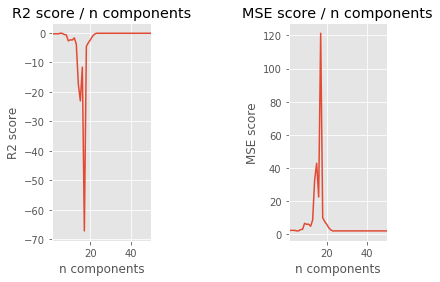

In [78]:
# plot the scores to see the best n_components
plt.subplot(1, 3, 1)
scores_df['R2'].plot(kind='line')
plt.title('R2 score / n components')
plt.ylabel('R2 score')
plt.xlabel('n components')

plt.subplot(1, 3, 3)
scores_df['MSE'].plot(kind='line')
plt.title('MSE score / n components')
plt.ylabel('MSE score')
plt.xlabel('n components')

plt.show()

In [79]:
r2_max = scores_df['R2'].idxmax()
print("Best n:", r2_max, "R2 score:", scores_df['R2'][r2_max])

mse_min = scores_df['MSE'].idxmin()
print("Best n:", mse_min, "MSE:", scores_df['MSE'][mse_min])

Best n: 5 R2 score: -0.13414596721356475
Best n: 5 MSE: 2.0187726889398983


In [80]:
# Use the best n_components parameter
lreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_pca[:,:r2_max], y, test_size=0.2, random_state=0)
model = lreg.fit(X_train, y_train)

# check the result
y_pred = lreg.predict(X_test)
r2 = r2_score(y_test, y_pred) # r2 score
mse = mean_squared_error(y_test, y_pred) # mse
print("R2 score:", r2)
print("MSE:", mse)

R2 score: -0.13414596721356475
MSE: 2.0187726889398983


The result seems to getting worst compared with simple Linear Regression.

In [81]:
# Let's try to project the coefs back to the original number of features
eigenvectors = pca.components_
pcr_coefs = eigenvectors[:r2_max, :].T @ lreg.coef_

pcr_coefs.shape

(182,)

In [82]:
# Let's check which venue types effect the most and least
print('Max positive coefs:', pcr_coefs[np.argsort(-pcr_coefs)[:10]])
print('Venue types with most positive effect:', X.columns[np.argsort(-pcr_coefs)[:10]].values)
print('Max negative coefs:', pcr_coefs[np.argsort(pcr_coefs)[:10]])
print('Venue types with most negative effect:', X.columns[np.argsort(pcr_coefs)[:10]].values)
coef_abs = abs(pcr_coefs)
print('Min coefs:', pcr_coefs[np.argsort(coef_abs)[:10]])
print('Venue types with least effect:', X.columns[np.argsort(coef_abs)[:10]].values)

Max positive coefs: [0.01616825 0.016099   0.016099   0.016099   0.016099   0.016099
 0.016099   0.016099   0.016099   0.016099  ]
Venue types with most positive effect: ['Bed & Breakfast' 'Mexican Restaurant' 'Chocolate Shop' 'Gay Bar'
 'Food Court' 'Salon / Barbershop' 'Resort' 'Speakeasy' 'Swiss Restaurant'
 'Tram Station']
Max negative coefs: [-0.0093624  -0.00892851 -0.00892851 -0.00892851 -0.00892851 -0.00892851
 -0.00892851 -0.00892851 -0.00892851 -0.00876483]
Venue types with most negative effect: ['African Restaurant' 'Basketball Stadium' 'Gift Shop' 'Hot Dog Joint'
 'Cupcake Shop' 'Music Venue' 'General Entertainment'
 'Eastern European Restaurant' 'Malay Restaurant' 'Dessert Shop']
Min coefs: [-9.24274025e-07 -1.08533793e-05 -1.93782244e-04 -2.26064178e-04
  2.50784448e-04  2.54156171e-04  2.54156171e-04  2.54156171e-04
 -2.69167785e-04 -2.69167785e-04]
Venue types with least effect: ['Botanical Garden' 'Convenience Store' 'Middle Eastern Restaurant'
 'Seafood Restaurant' 'A

Again, the result doesn't seems very promising as the R2 score is still small. The machine learning models can't be used to predict precisely a neighborhood's average airbnb price.

Based on the observed coefficient correlations, fancy places like restaurants seem to boost tourists value the most. 
In some ways, it's a logical conclusion. Neighborhoods that have many restaurants are most likely business areas such as downtown. It's where lots of people go to, lots of activities to enjoy, lots of other businesses, .... The kind of places that people like to live at or closeby.
And as a result of high demand, the price will be higher than other more rural or residencial neighborhoods.

# Conclusion: 

Analysing the clusters we can name as follow:


Cluster 0: Tourism area (Because has Park, Gym, Pub, Restaurant, theat).   
Cluster 1: Business area (Because has Hotels, many coffee shops and gift shop).   
Cluster 2: Living Area with less population and far from the business and tourism area (Because has less options and interaction with Gym, for example).


The client satisfaction show the prefence for rentting close to tourism places.   
The majority of rooms are in the tourism areas, but till can explorer business area cause it is a alternative from hotels. Business area has god trnport system that it would be attractive to the clients.